# Introduzione



Il seguente progetto è corredato da una documentazione esterna.

## Descrizione del problema




La medicina sta diventando sempre più data-driven, con dati provenienti da cartelle cliniche elettroniche, imaging medico (radiografie, TAC, MRI), wearables e sensori remoti, e testi clinici non strutturati. Questi dati supportano diagnosi precoci, personalizzazione delle terapie, prevenzione e monitoraggio dei pazienti e ottimizzazione delle risorse sanitarie.

Il problema dell’**anonimizzazione dei dati** riguarda la trasformazione di dataset contenenti informazioni personali o sensibili in una forma che impedisca di risalire all’identità degli individui, pur mantenendo il più possibile l’utilità dei dati per analisi statistiche o applicazioni di machine learning.

La sfida principale sta nel bilanciare due esigenze spesso in conflitto:

* **Protezione della privacy** → evitare che dati come nome, indirizzo, codice fiscale o informazioni sanitarie possano essere ricondotti a una persona specifica.
* **Utilità dei dati** → preservare abbastanza dettaglio e struttura da permettere analisi accurate, senza distorsioni eccessive.

Anche dopo l’anonimizzazione, esiste il rischio di **re-identificazione** incrociando i dati con altre fonti. Per questo vengono usate tecniche come pseudonimizzazione, generalizzazione, randomizzazione.

L’**obiettivo** di questo progetto è analizzare e confrontare diverse tecniche di anonimizzazione dei dati sensibili e valutarne l’impatto sulle performance dei modelli predittivi.

## Research Question
Questo progetto si propone di rispondere a 4 domande di ricerca principali:
 1. Quali fattori influenzano maggiormente l'esito dei test clinici (Test Results)?

2. C'è differenza tra i risultati dei test tra maschi e femmine o tra fasce di età?

3. Posso generare e anonimizzare automaticamente testi coerenti partendo dai dati clinici strutturati?

4. Quanto è efficace il Named Entity Recognition (NER) nell'anonimizzare automaticamente le note cliniche generate?

#Analisi Esplorativa del Dataset

Il **dataset Healtcare Dataset** è stato creato per essere una risorsa utile per gli appassionati di data science, machine learning e analisi dei dati. È progettato per imitare i dati sanitari del mondo reale, consentendo agli utenti di praticare, sviluppare e mostrare le loro abilità di manipolazione e analisi dei dati nel contesto del settore sanitario.

Ogni colonna fornisce informazioni specifiche sul paziente, sul suo ricovero e sui servizi sanitari ricevuti, rendendo questo dataset adatto a diversi compiti di analisi dei dati e modellazione nel settore sanitario. Ecco una breve spiegazione di ciascuna colonna del dataset:

* **Name**: rappresenta il nome del paziente associato al record sanitario.
* **Age**: l’età del paziente al momento del ricovero, espressa in anni.
* **Gender**: indica il genere del paziente, “Maschio” o “Femmina”.
* **Blood Type**: il gruppo sanguigno del paziente, che può essere uno dei gruppi comuni (es. “A+”, “O-”, ecc.).
* **Medical Condition**: specifica la principale condizione medica o diagnosi del paziente, come “Diabete”, “Ipertensione”, “Asma”, ecc.
* **Date of Admission**: la data in cui il paziente è stato ricoverato presso la struttura sanitaria.
* **Doctor**: il nome del medico responsabile delle cure del paziente durante il ricovero.
* **Hospital**: identifica la struttura sanitaria o l’ospedale dove il paziente è stato ricoverato.
* **Insurance Provider**: indica il fornitore dell’assicurazione del paziente, tra diverse opzioni come “Aetna”, “Blue Cross”, “Cigna”, “UnitedHealthcare” e “Medicare”.
* **Billing Amount**: l’ammontare in denaro fatturato per i servizi sanitari ricevuti durante il ricovero, espresso come numero decimale.
* **Room Number**: il numero della stanza in cui il paziente è stato ospitato durante il ricovero.
* **Admission Type**: specifica il tipo di ricovero, che può essere “Emergenza”, “Elettivo” o “Urgente”, a seconda delle circostanze.
* **Discharge Date**: la data in cui il paziente è stato dimesso dalla struttura sanitaria, calcolata a partire dalla data di ricovero e un numero casuale di giorni entro un intervallo realistico.
* **Medication**: identifica un farmaco prescritto o somministrato al paziente durante il ricovero, ad esempio “Aspirina”, “Ibuprofene”, “Penicillina”, “Paracetamolo” o “Lipitor”.
* **Test Results**: descrive l’esito di un test medico effettuato durante il ricovero, con valori possibili come “Normale”, “Anormale” o “Inconcludente”, indicando il risultato del test.




## Caricamento del dataset

La prima fase del progetto richiede il caricamento del dataset all’interno dell’ambiente di sviluppo.
Inoltre, si andrà ad effettuare la pulizia dei dati in modo tale da averli pronti per le successive fasi di analisi del dataset.

In [ ]:
import pandas as pd

# Carica il dataset (modifica il percorso e il nome file)
df = pd.read_csv("healthcare_dataset.csv")

# 1. Informazioni di base
print("Forma del dataset:", df.shape)

# 2. Prime righe del dataset
print("\nPrime 5 righe:")
df.head()



Forma del dataset: (55500, 15)

Prime 5 righe:


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


## Identificazione dei valori null e delle celle vuote

In [ ]:
# 3. Valori nulli (NaN)
print("\nValori nulli per colonna:")
print(df.isnull().sum())

# 4. Celle vuote (stringhe vuote)
print("\nCelle vuote (stringhe vuote) per colonna:")
empty_strings = (df == '').sum()
print(empty_strings)


Valori nulli per colonna:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Celle vuote (stringhe vuote) per colonna:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


Non sono presenti valori mancanti, il che garantisce un'analisi totale fin dall'inizio.

## Identificazione di eventuali duplicati

In [ ]:
# 5. Numero di righe duplicate
print("\nNumero di righe duplicate:", df.duplicated().sum())

# 6. Visualizza le righe duplicate in forma tabellare (se esistono)
duplicates = df[df.duplicated()]
if not duplicates.empty:
    print("\nEsempi di righe duplicate:")
    display(duplicates.head())  # Mostra tabella formattata



Numero di righe duplicate: 534

Esempi di righe duplicate:


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
50023,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive
50040,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal
50055,SCoTT tHOrNton,55,Female,B-,Obesity,2021-04-08,Joshua Ingram,Keller LLC,Medicare,30894.904511,455,Urgent,2021-04-15,Aspirin,Abnormal
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
50078,chRistOPheR NoRrIs,38,Male,AB-,Arthritis,2023-01-14,Denise Blair,Inc Morales,Medicare,9072.127142,452,Emergency,2023-02-12,Penicillin,Normal


In [ ]:
# Trova le righe duplicate (comprese le originali)
duplicated_all = df[df.duplicated(keep=False)]

# Raggruppa le righe duplicate identiche e conta quante volte compaiono
grouped = duplicated_all.groupby(list(df.columns)).apply(lambda x: list(x.index)).reset_index(name='Indici')

# Aggiunge anche la colonna con il numero di occorrenze
grouped['Occorrenze'] = grouped['Indici'].apply(len)

# Ordina per numero di occorrenze (facoltativo)
grouped = grouped.sort_values(by='Occorrenze', ascending=False)

# Visualizzazione tabellare
grouped


/tmp/ipython-input-1273473457.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = duplicated_all.groupby(list(df.columns)).apply(lambda x: list(x.index)).reset_index(name='Indici')


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Indici,Occorrenze
533,zaCHAry balL,85,Female,B-,Diabetes,2020-04-25,Matthew Conley,"and Morgan Jones, Matthews",Blue Cross,15207.547262,202,Emergency,2020-05-25,Penicillin,Inconclusive,"[6345, 51964]",2
0,ABIgaIL YOung,41,Female,O+,Hypertension,2022-12-15,Edward Kramer,Moore-Mcdaniel,UnitedHealthcare,1983.568297,192,Elective,2023-01-13,Ibuprofen,Normal,"[42407, 54285]",2
1,ALIcia taYLoR,78,Male,O+,Asthma,2022-09-18,Dawn Burton,Wright LLC,Aetna,31465.274979,149,Elective,2022-10-15,Aspirin,Inconclusive,"[26025, 53104]",2
2,AMy GREEN,79,Female,B+,Obesity,2021-03-30,Brett Johnson,Taylor-Williamson,UnitedHealthcare,23402.358491,249,Elective,2021-04-27,Penicillin,Abnormal,"[42323, 50151]",2
3,ANDREA HansEN,61,Male,O+,Cancer,2021-07-02,Alisha Flores,LLC Clark,Cigna,40026.763948,254,Elective,2021-07-22,Paracetamol,Normal,"[21675, 51695]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,AdAM tHOmaS,75,Male,O+,Hypertension,2022-01-02,Beverly Miller,Sanchez-Wilson,Cigna,16294.907725,180,Urgent,2022-01-30,Ibuprofen,Normal,"[40385, 53139]",2
9,ANgELa praTT,78,Female,A-,Hypertension,2022-09-09,Amber Lee,"Wong Clark, and Moran",Cigna,29348.941782,146,Urgent,2022-10-05,Lipitor,Abnormal,"[38739, 53658]",2
8,ANdrEa Wade,25,Male,O-,Obesity,2019-12-12,Jeffrey Mcintosh,Ltd Perez,UnitedHealthcare,7122.460530,393,Emergency,2020-01-03,Aspirin,Abnormal,"[12465, 55301]",2
7,ANdrE WoOds,78,Female,A+,Arthritis,2023-02-21,Sheila Rodgers,Carpenter Ltd,Blue Cross,50089.293680,320,Urgent,2023-03-06,Penicillin,Inconclusive,"[4767, 50645]",2


Sono stati riscontrati 534 record duplicati che andranno rimossi nella fase di data cleaning.

# Data Cleaning
In questa fase avviene la prima pulizia del dataset, che comprende tra le altre cose la rimozione di valori duplicati, l'eventuale modifica delle feature e la loro standardizzazione.

## Rimozione dei duplicati
Dopo l'identificazione dei record duplicati, si procede con la loro rimozione dal dataset.

In [ ]:
# Rimuove tutte le righe duplicate (esattamente identiche in ogni colonna)
df = df.drop_duplicates(keep='first')  # mantiene la prima occorrenza

# 5. Numero di righe duplicate
print("\nNumero di righe duplicate dopo la loro cancellazione:", df.duplicated().sum())

# 6. Visualizza le righe duplicate in forma tabellare (se esistono)
duplicates = df[df.duplicated()]
if not duplicates.empty:
    print("\nEsempi di righe duplicate:")
    display(duplicates.head())  # Mostra tabella formattata



Numero di righe duplicate dopo la loro cancellazione: 0


## Normalizzazione della colonna Name
La colonna Name presenta un formato non standardizzato, ad esempio i nomi sono di questo tipo: "zaCHAry balL". La successiva modifica comporterà il passaggio al formato standard in cui la prima lettera della parola è maiuscola mentre le successive minuscole: "Zachary Ball".

In [ ]:
# Normalizza rimuovendo spazi e rendendo la prima lettera maiuscola
df['Name'] = df['Name'].str.strip().str.title()

#Stampa delle prime 5 righe dopo la normalizzazione
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
# Trova tutte le righe con nomi duplicati
mask = df['Name'].duplicated(keep=False)
dups = df[mask].copy()

# Raggruppa per nome pulito e conta occorrenze + indici
grouped = dups.groupby('Name').apply(
    lambda g: pd.Series({
        'Indici': list(g.index),
        'Occorrenze': len(g),
        'Esempio': g['Name'].iloc[0]  # mostra un esempio del nome originale
    })
).reset_index()

# Mostra tabella
display(grouped)

# Somma totale delle occorrenze (cioè quante righe in totale hanno nomi ripetuti)
totale_occorrenze = grouped['Occorrenze'].sum()
print(f"Totale righe con nomi duplicati: {totale_occorrenze}")


/tmp/ipython-input-850869906.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = dups.groupby('Name').apply(


,Name,Indici,Occorrenze,Esempio
0,Aaron Archer,"[3040, 54112]",2,Aaron Archer
1,Aaron Baker,"[10399, 39711]",2,Aaron Baker
2,Aaron Bradshaw,"[462, 13018]",2,Aaron Bradshaw
3,Aaron Carr,"[33886, 51385]",2,Aaron Carr
4,Aaron Dalton,"[30468, 52721]",2,Aaron Dalton
...,...,...,...,...
9385,Zachary Singh,"[9782, 54303]",2,Zachary Singh
9386,Zachary Strickland,"[25207, 45592]",2,Zachary Strickland
9387,Zachary Thompson,"[27622, 51225]",2,Zachary Thompson
9388,Zachary Williams,"[22540, 51915]",2,Zachary Williams


Totale righe con nomi duplicati: 24121


Sono stati rilevati 24121 righe con nomi duplicati. Il dataset è composto da dati sintetici, che simulano il mondo reale, quindi è normale avere tutti questi duplicati con la colonna Name. Ma questo non basta per dire che ci troviamo di fronte alla stessa persona, poichè potremmo avere casi di omonimia. Inoltre una persona può comparire in diversi record poichè potrebbe essersi recata in ospedale più volte anche per patologie diverse.


In [ ]:
sample_duplicates = df[df['Name'].isin(grouped['Name'].sample(5))]
display(sample_duplicates.sort_values('Name'))

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
10660,Jeffery Johnson,40,Male,B-,Asthma,2021-10-24,Laura Sherman,Davis-Arroyo,Cigna,9333.856172,129,Emergency,2021-11-02,Penicillin,Abnormal
18557,Jeffery Johnson,42,Female,O+,Obesity,2023-09-26,William Johnson,"Lutz Jackson Coffey, and",Cigna,47005.481410,250,Elective,2023-10-21,Ibuprofen,Abnormal
50738,Jeffery Johnson,39,Male,B-,Asthma,2021-10-24,Laura Sherman,Davis-Arroyo,Cigna,9333.856172,129,Emergency,2021-11-02,Penicillin,Abnormal
30995,Jeffrey Henry,35,Male,AB+,Diabetes,2023-04-21,George Griffin,Walker Ltd,Cigna,32634.372353,306,Urgent,2023-04-30,Lipitor,Inconclusive
53600,Jeffrey Henry,31,Male,AB+,Diabetes,2023-04-21,George Griffin,Walker Ltd,Cigna,32634.372353,306,Urgent,2023-04-30,Lipitor,Inconclusive
35401,John Pugh,29,Male,O+,Hypertension,2023-03-24,Brian Miller,Fisher Ltd,UnitedHealthcare,37990.273318,206,Urgent,2023-04-11,Ibuprofen,Inconclusive
41690,John Pugh,80,Female,AB-,Hypertension,2020-02-27,Nicole Smith,Williams-Jones,Blue Cross,43337.183621,361,Urgent,2020-03-15,Aspirin,Inconclusive
2281,Megan Martin,29,Male,B+,Cancer,2019-08-10,Bradley Henderson,Smith Group,Cigna,18548.756069,297,Urgent,2019-09-04,Penicillin,Abnormal
34847,Megan Martin,68,Male,AB+,Obesity,2022-07-04,Michelle Rhodes,Allen Sons and,UnitedHealthcare,39697.637312,420,Elective,2022-07-12,Ibuprofen,Normal
55434,Megan Martin,26,Male,B+,Cancer,2019-08-10,Bradley Henderson,Smith Group,Cigna,18548.756069,297,Urgent,2019-09-04,Penicillin,Abnormal


Come mostrato nella tabella, ci sono casi in cui le variazioni tra omonimi sono insignificanti, come ad esempio Kelly Matthews: infatti si ha che, quando la paziente è donna l'unica variazione tra le due entry del dataset è relativa alla differenza di età, che nello specifico è di 1 anno. Una differenza così piccola indica che ci troviamo, di fatto, di fronte alla stessa persona.

## Analisi di righe con una sola feature di differenza
Questa sezione mira a comprendere quanti record all'interno del dataset presentano una differenza di una sola colonna, e quindi di fatto mostrano lo stesso individuo duplicato diverse volte.
Ciò è propedeutico per decidere se questi record in più possono essere lasciati oppure se possono essere eliminati.

In [ ]:
# Trova tutte le righe che hanno una combinazione duplicata tra Name, Gender e Blood Type
mask = df.duplicated(subset=['Name', 'Gender', 'Blood Type'], keep=False)
dups = df[mask].copy()

# Raggruppa per le 3 colonne
grouped = dups.groupby(['Name', 'Gender', 'Blood Type']).apply(
    lambda g: pd.Series({
        'Occorrenze': len(g),
        'Indici': list(g.index),
        'Esempio_Name': g['Name'].iloc[0]  # mostriamo il nome originale come esempio
    })
).reset_index()

# Ordina in base al numero di occorrenze decrescenti
grouped = grouped.sort_values(by='Occorrenze', ascending=False)

# Mostra la tabella
display(grouped)

# Calcola la somma totale delle occorrenze
totale = grouped['Occorrenze'].sum()
print(f"\nTotale righe che condividono la stessa combinazione Name + Gender + Blood Type: {totale}")


/tmp/ipython-input-361179817.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = dups.groupby(['Name', 'Gender', 'Blood Type']).apply(


,Name,Gender,Blood Type,Occorrenze,Indici,Esempio_Name
2251,James Williams,Female,AB-,5,"[5071, 6649, 33176, 39121, 51487]",James Williams
4053,Michael Smith,Female,A-,5,"[6077, 8380, 14564, 48123, 52648]",Michael Smith
1092,Christopher Young,Male,A-,5,"[29285, 35015, 38572, 52572, 53615]",Christopher Young
581,Bonnie Hernandez,Female,AB+,4,"[8802, 28370, 53595, 54260]",Bonnie Hernandez
4043,Michael Rodriguez,Female,O-,4,"[28073, 33899, 40551, 53233]",Michael Rodriguez
...,...,...,...,...,...,...
1957,Gerald Morris Jr.,Male,B+,2,"[40534, 52242]",Gerald Morris Jr.
1956,George Wilson,Male,A-,2,"[48473, 51911]",George Wilson
1955,George Watkins,Female,AB-,2,"[32417, 54129]",George Watkins
1954,George Schwartz,Female,B-,2,"[32412, 52464]",George Schwartz



Totale righe che condividono la stessa combinazione Name + Gender + Blood Type: 11849


L'analisi appena condotta si basa sulle caratteristiche che nel corso della vita sono soggette ad una variazione prossima allo 0: usare Name, Gender e Blood Type in maniera combinata serve per capire quante persone presentano un'uguaglianza sostanziale. L'analisi condotta anche su altri fattori, come il medico di riferimento non avrebbe avuto lo stesso impatto in quanto è plausibile che una persona possa avere diverse patologie o problematiche e per questo decidere di farsi curare da un medico diverso.

In [ ]:
# Trova tutte le righe che hanno una combinazione duplicata tra Name, Gender Blood Type e Age
mask = df.duplicated(subset=['Name', 'Age', 'Gender', 'Blood Type'], keep=False)
dups = df[mask].copy()

# Raggruppa per le 3 colonne
grouped = dups.groupby(['Name', 'Age', 'Gender', 'Blood Type']).apply(
    lambda g: pd.Series({
        'Occorrenze': len(g),
        'Indici': list(g.index),
        'Esempio_Name': g['Name'].iloc[0]  # mostriamo il nome originale come esempio
    })
).reset_index()

# Ordina in base al numero di occorrenze decrescenti
grouped = grouped.sort_values(by='Occorrenze', ascending=False)

# Mostra la tabella
display(grouped)

# Calcola la somma totale delle occorrenze
totale = grouped['Occorrenze'].sum()
print(f"\nTotale righe che condividono la stessa combinazione Name + Age + Gender + Blood Type: {totale}")


/tmp/ipython-input-1766050741.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = dups.groupby(['Name', 'Age', 'Gender', 'Blood Type']).apply(


,Name,Age,Gender,Blood Type,Occorrenze,Indici,Esempio_Name
0,Amanda Smith,41,Female,O+,2,"[43395, 51047]",Amanda Smith
1,Angela Brown,67,Male,O+,2,"[42262, 49590]",Angela Brown
2,Ashley Garcia,59,Male,O-,2,"[2502, 17169]",Ashley Garcia
3,Christopher Young,60,Male,A-,2,"[29285, 35015]",Christopher Young
4,Cody Jones,53,Male,A-,2,"[35589, 42031]",Cody Jones
5,Eileen Moore,34,Female,B-,2,"[19047, 44892]",Eileen Moore
6,Gregory Jones,74,Female,A+,2,"[13968, 46838]",Gregory Jones
7,James Brown,84,Male,O+,2,"[43145, 45865]",James Brown
8,James Davis,59,Female,O-,2,"[19886, 37583]",James Davis
9,James Miller,46,Male,A+,2,"[5979, 18028]",James Miller



Totale righe che condividono la stessa combinazione Name + Age + Gender + Blood Type: 44


Se all'analisi precedente si aggiunge anche la colonna dell'età, si ha che la variabilità cresce moltissimo, tanto da ridurre la possibilità di trovarsi di fronte alla stessa persona.
Aumentare il numero di colonne per effettuare il confronto farà ridurre ancora di più il numero di persone duplicate all'interno del dataset.

In [ ]:
# Colonne chiave e feature
group_cols = ['Name', 'Gender', 'Blood Type']
feature_cols = [col for col in df.columns if col not in group_cols]

# Raggruppamento
grouped = df.groupby(group_cols)

# Conta i gruppi in cui tutte le coppie differiscono per esattamente n colonne
def count_groups_with_exact_diff(n_diff):
    count = 0
    for _, group in grouped:
        if len(group) < 2:
            continue
        rows = group[feature_cols].astype(str).values
        all_exact = True
        for i in range(len(rows)):
            for j in range(i+1, len(rows)):
                diff = (rows[i] != rows[j]).sum()
                if diff != n_diff:
                    all_exact = False
                    break
            if not all_exact:
                break
        if all_exact:
            count += 1
    return count

# Conta i gruppi con esattamente 1 o 2 colonne diverse
count_eq_1 = count_groups_with_exact_diff(1)
count_eq_2 = count_groups_with_exact_diff(2)

print(f"Gruppi in cui tutte le righe differiscono per esattamente 1 colonna: {count_eq_1}")
print(f"Gruppi in cui tutte le righe differiscono per esattamente 2 colonne: {count_eq_2}")


Gruppi in cui tutte le righe differiscono per esattamente 1 colonna: 4753
Gruppi in cui tutte le righe differiscono per esattamente 2 colonne: 0


L'analisi sin qui condotta mostra come, basandoci sulle caratteristiche di Name, Gender e Blood Type, le persone che presentano tali caratteristiche in comune, ossia sono con una buona probabilità la stessa persona, e che hanno di dissimile solo una feature sono 4753.

In [ ]:
# Colonne chiave e feature
group_cols = ['Name', 'Gender', 'Blood Type']
feature_cols = [col for col in df.columns if col not in group_cols]

# Raggruppamento
grouped = df.groupby(group_cols)

# Lista per raccogliere gli indici delle righe dei gruppi validi
valid_indices = []

# Gruppi in cui tutte le righe differiscono per esattamente 1 colonna
for _, group in grouped:
    if len(group) < 2:
        continue
    rows = group[feature_cols].astype(str).values
    all_exact = True
    for i in range(len(rows)):
        for j in range(i+1, len(rows)):
            diff = (rows[i] != rows[j]).sum()
            if diff != 1:
                all_exact = False
                break
        if not all_exact:
            break
    if all_exact:
        valid_indices.extend(group.index.tolist())

# Seleziona le righe corrispondenti
identical_df = df.loc[valid_indices]

# Salva su file CSV
identical_df.to_csv('Identici.csv', index=False)

# Mostra un sample
identical_df.head(20)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
3040,Aaron Archer,47,Female,B-,Cancer,2021-01-10,Cynthia Villanueva,"Montes Case and Mendez,",Medicare,10602.077185,108,Urgent,2021-01-17,Paracetamol,Inconclusive
54112,Aaron Archer,49,Female,B-,Cancer,2021-01-10,Cynthia Villanueva,"Montes Case and Mendez,",Medicare,10602.077185,108,Urgent,2021-01-17,Paracetamol,Inconclusive
33886,Aaron Carr,59,Female,O-,Asthma,2023-06-20,Diane Davis,"Jones, Holmes Kelley and",Blue Cross,29042.961828,171,Emergency,2023-06-21,Paracetamol,Abnormal
51385,Aaron Carr,60,Female,O-,Asthma,2023-06-20,Diane Davis,"Jones, Holmes Kelley and",Blue Cross,29042.961828,171,Emergency,2023-06-21,Paracetamol,Abnormal
30468,Aaron Dalton,25,Male,O+,Arthritis,2022-08-22,Sarah Adams,Schroeder PLC,Blue Cross,2070.259477,279,Urgent,2022-09-05,Paracetamol,Inconclusive
52721,Aaron Dalton,26,Male,O+,Arthritis,2022-08-22,Sarah Adams,Schroeder PLC,Blue Cross,2070.259477,279,Urgent,2022-09-05,Paracetamol,Inconclusive
44720,Aaron Davis,75,Male,O-,Asthma,2023-01-26,John Reyes,Lee-Brown,Blue Cross,23020.208076,339,Urgent,2023-02-04,Ibuprofen,Abnormal
55252,Aaron Davis,77,Male,O-,Asthma,2023-01-26,John Reyes,Lee-Brown,Blue Cross,23020.208076,339,Urgent,2023-02-04,Ibuprofen,Abnormal
39477,Aaron Fox,81,Male,O-,Arthritis,2022-05-04,Christopher Freeman,"and Vega Gonzales, Coffey",UnitedHealthcare,11269.630146,263,Elective,2022-05-30,Penicillin,Abnormal
50385,Aaron Fox,82,Male,O-,Arthritis,2022-05-04,Christopher Freeman,"and Vega Gonzales, Coffey",UnitedHealthcare,11269.630146,263,Elective,2022-05-30,Penicillin,Abnormal


Da questo sample di dataset, si vede che le persone che presentano quelle 3 caratteristiche in comune e che hanno una sola feature di differenza, sono per la maggior parte, o la quasi totalità, persone che si differenziano esclusivamente per l'età.

### Analisi della distribuzione delle etichette da predire
Prima di procedere con l'eliminazione delle righe appena analizzate, verifichiamo la distribuzione delle etichette per comprendere se il dataset risulta bilanciato oppure no.

In [ ]:
# Specifica il nome della colonna target (ad esempio 'label')
target_col = 'Test Results'

# Mostra la distribuzione delle etichette
distribuzione = df[target_col].value_counts()

# Mostra anche le percentuali
percentuali = df[target_col].value_counts(normalize=True) * 100

# Stampa i risultati
print("Distribuzione assoluta delle etichette:")
print(distribuzione)

print("\nDistribuzione percentuale delle etichette:")
print(percentuali)


Distribuzione assoluta delle etichette:
Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64

Distribuzione percentuale delle etichette:
Test Results
Abnormal        33.542554
Normal          33.349707
Inconclusive    33.107739
Name: proportion, dtype: float64


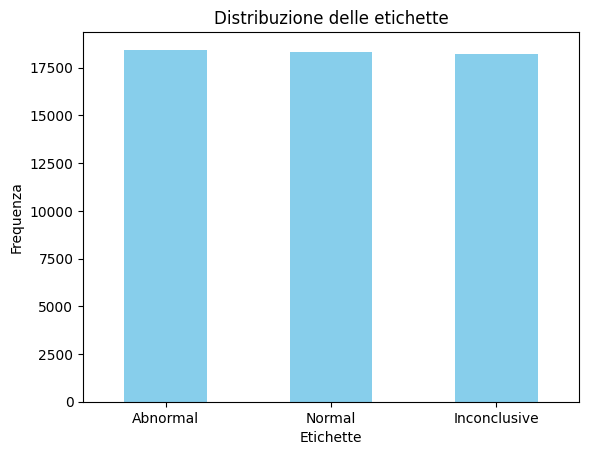

In [ ]:
import matplotlib.pyplot as plt

distribuzione.plot(kind='bar', color='skyblue')
plt.title('Distribuzione delle etichette')
plt.xlabel('Etichette')
plt.ylabel('Frequenza')
plt.xticks(rotation=0)
plt.show()


A fronte di questi dati, la distribuzione delle etichette risulta fortemente bilanciata. A questo punto si può procedere con la rimozione delle righe con una sola feature di differenza dal dataset.

In [ ]:
# Lista per conservare solo un indice per ciascun gruppo duplicato "1-colonna-diversa"
indices_to_keep = set()
indices_to_remove = set()

for _, group in grouped:
    if len(group) < 2:
        continue
    rows = group[feature_cols].astype(str).values
    all_exact = True
    for i in range(len(rows)):
        for j in range(i+1, len(rows)):
            diff = (rows[i] != rows[j]).sum()
            if diff != 1:
                all_exact = False
                break
        if not all_exact:
            break
    if all_exact:
        # Tieni solo il primo indice del gruppo
        keep_idx = group.index[0]
        indices_to_keep.add(keep_idx)

        # Tutti gli altri indici sono da rimuovere
        for idx in group.index[1:]:
            indices_to_remove.add(idx)

# Applichiamo la rimozione solo degli indici extra (duplicati)
df = df.drop(index=indices_to_remove).reset_index(drop=True)

# Stampa riepilogo
print(f"Rimosse {len(indices_to_remove)} righe duplicate (differenti solo per 1 colonna), conservandone una per gruppo.")



Rimosse 4753 righe duplicate (differenti solo per 1 colonna), conservandone una per gruppo.


In [ ]:
# Colonne chiave e feature
group_cols = ['Name', 'Gender', 'Blood Type']
feature_cols = [col for col in df.columns if col not in group_cols]

# Raggruppamento
grouped = df.groupby(group_cols)

# Conta i gruppi in cui tutte le coppie differiscono per esattamente n colonne
def count_groups_with_exact_diff(n_diff):
    count = 0
    for _, group in grouped:
        if len(group) < 2:
            continue
        rows = group[feature_cols].astype(str).values
        all_exact = True
        for i in range(len(rows)):
            for j in range(i+1, len(rows)):
                diff = (rows[i] != rows[j]).sum()
                if diff != n_diff:
                    all_exact = False
                    break
            if not all_exact:
                break
        if all_exact:
            count += 1
    return count

# Conta i gruppi con esattamente 1 o 2 colonne diverse
count_eq_1 = count_groups_with_exact_diff(1)
count_eq_2 = count_groups_with_exact_diff(2)

print(f"Gruppi in cui tutte le righe differiscono per esattamente 1 colonna: {count_eq_1}")
print(f"Gruppi in cui tutte le righe differiscono per esattamente 2 colonne: {count_eq_2}")

Gruppi in cui tutte le righe differiscono per esattamente 1 colonna: 0
Gruppi in cui tutte le righe differiscono per esattamente 2 colonne: 0


In [ ]:
# Specifica il nome della colonna target (ad esempio 'label')
target_col = 'Test Results'

# Mostra la distribuzione delle etichette
distribuzione = df[target_col].value_counts()

# Mostra anche le percentuali
percentuali = df[target_col].value_counts(normalize=True) * 100

# Stampa i risultati
print("Distribuzione assoluta delle etichette:")
print(distribuzione)

print("\nDistribuzione percentuale delle etichette:")
print(percentuali)

Distribuzione assoluta delle etichette:
Test Results
Abnormal        16865
Normal          16742
Inconclusive    16606
Name: count, dtype: int64

Distribuzione percentuale delle etichette:
Test Results
Abnormal        33.586920
Normal          33.341963
Inconclusive    33.071117
Name: proportion, dtype: float64


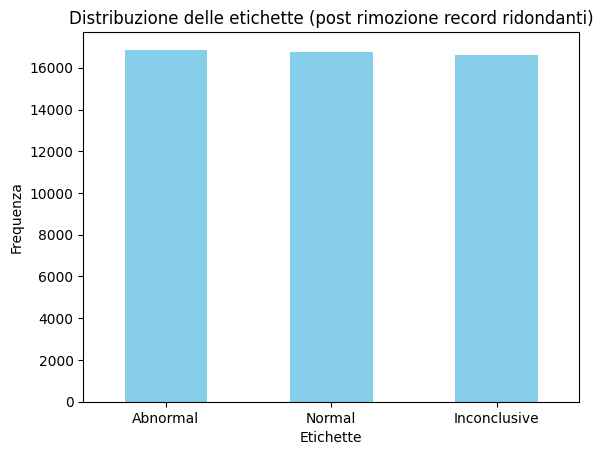

In [ ]:
distribuzione.plot(kind='bar', color='skyblue')
plt.title('Distribuzione delle etichette (post rimozione record ridondanti)')
plt.xlabel('Etichette')
plt.ylabel('Frequenza')
plt.xticks(rotation=0)
plt.show()

L'eliminazione delle righe che hanno in comune Name, Gender e Blood Type, ma che differiscono di una sola colonna, ha lasciato sostanzialmente inviarata la distribuzione delle etichette della Y Test Results. Il dataset si mantiene quindi bilanciato.

## Rimozione della colonna Room Number
La feature Room Number viene rimossa in quanto l'abbiamo ritenuta inutile ai fini dell'analisi e dell'addestramento di un modello di ML.

In [ ]:
df.drop(columns=['Room Number'], inplace=True)
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal


# Statistica descrittiva
L’analisi statistica univariata rappresenta un passo fondamentale nella comprensione dei valori presenti nel dataset. In questa sezione vengono esaminate, da un punto di vista statistico, le varie feature presenti all'interno del dataset.

###Statistiche delle variabili numeriche:

In [ ]:
df.describe(include=['number'])

,Age,Billing Amount
count,50213.000000,50213.000000
mean,51.575449,25554.091041
std,19.582698,14216.133950
min,13.000000,-2008.492140
25%,35.000000,13237.449118
50%,52.000000,25541.978243
75%,68.000000,37858.031471
max,86.000000,52764.276736


Age ha una media di circa 51 anni con un range 13-88 che è una distribuzione pressocché verosimile. Billing Amount ha valori negativi: questo è probabilmente dovuto a qualche errore di inserimento nei dati.

###Statistiche delle variabili categoriche:

In [ ]:
df.describe(include='object')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,50213,50213,50213,50213,50213,50213,50213,50213,50213,50213,50213,50213
unique,40235,2,8,6,1827,40341,39876,5,3,1856,5,3
top,Michael Smith,Female,AB+,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,Elective,2021-12-13,Lipitor,Abnormal
freq,23,25121,6313,8471,46,24,40,10133,16905,45,10077,16865


Molte variabili, tra cui Gender e Blood Type, hanno poche categorie. Verrà quindi utilizzato l'encoding per convertirle in numeri. Verrano encodate Gender, Blood Type, Medical Condition, Medication, Admission Type e Test Results.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50213 entries, 0 to 50212
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                50213 non-null  object 
 1   Age                 50213 non-null  int64  
 2   Gender              50213 non-null  object 
 3   Blood Type          50213 non-null  object 
 4   Medical Condition   50213 non-null  object 
 5   Date of Admission   50213 non-null  object 
 6   Doctor              50213 non-null  object 
 7   Hospital            50213 non-null  object 
 8   Insurance Provider  50213 non-null  object 
 9   Billing Amount      50213 non-null  float64
 10  Admission Type      50213 non-null  object 
 11  Discharge Date      50213 non-null  object 
 12  Medication          50213 non-null  object 
 13  Test Results        50213 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.4+ MB


In [ ]:
#trasformo la variabile di interesse in categoriche
for col in ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results']:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50213 entries, 0 to 50212
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Name                50213 non-null  object  
 1   Age                 50213 non-null  int64   
 2   Gender              50213 non-null  category
 3   Blood Type          50213 non-null  category
 4   Medical Condition   50213 non-null  category
 5   Date of Admission   50213 non-null  object  
 6   Doctor              50213 non-null  object  
 7   Hospital            50213 non-null  object  
 8   Insurance Provider  50213 non-null  object  
 9   Billing Amount      50213 non-null  float64 
 10  Admission Type      50213 non-null  category
 11  Discharge Date      50213 non-null  object  
 12  Medication          50213 non-null  category
 13  Test Results        50213 non-null  category
dtypes: category(6), float64(1), int64(1), object(6)
memory usage: 3.4+ MB


In [ ]:
# Controllo outlier o valori anomali sulle numeriche
print("Valori Billing Amount anomali:", df[df['Billing Amount'] < 0].shape[0])

Valori Billing Amount anomali: 96


Dunque eliminiamo le 96 righe che hanno un billing amount negativo.

In [ ]:
df = df[df['Billing Amount'] >= 0]

### Boxplot Billing Amount ed Age

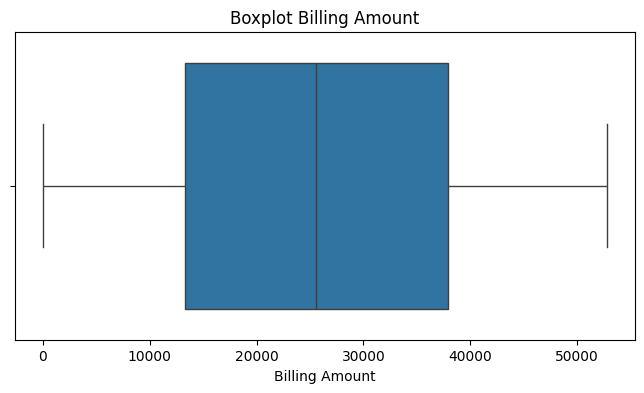

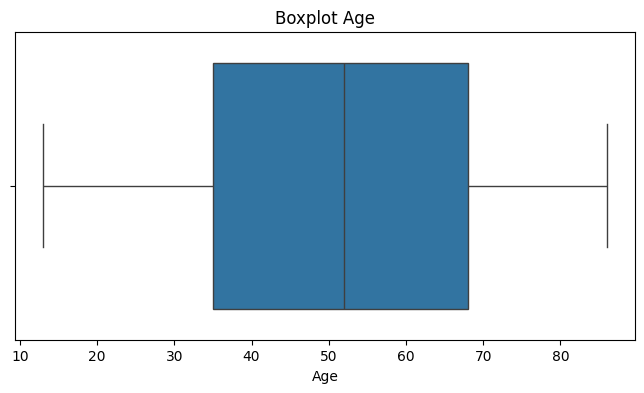

In [ ]:
import seaborn as sns
# Boxplot Billing Amount
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Billing Amount'])
plt.title('Boxplot Billing Amount')
plt.show()

# Boxplot Age
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot Age')
plt.show()

In entrambi i casi la mediana si trova approssimativamente al centro del box, indicando una distribuzione dei dati piuttosto simmetrica. I valori di "Billing Amount" sono distribuiti in modo abbastanza uniforme tra il minimo e il massimo, senza la presenza di outlier evidenti. Il boxplot di age risulta leggermente spostato verso destra. Questo potrebbbe indicare una prevalenza di anziani.

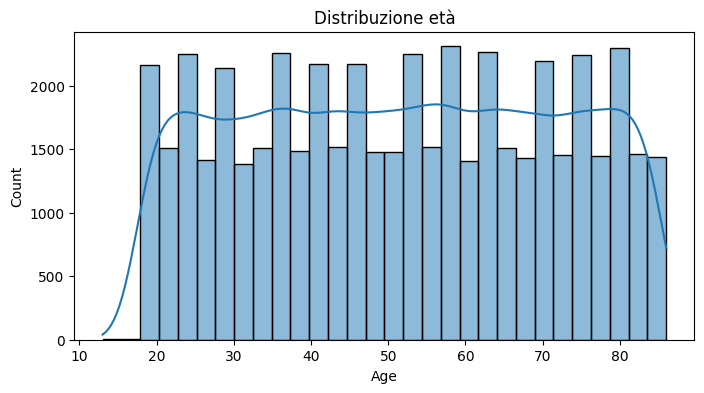

In [ ]:
# Istogramma Age
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribuzione età')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

L’età dei pazienti è distribuita in modo quasi uniforme tra 13 e 88 anni, con picchi piuttosto diffusi. L'andamento altalenante è dovuto anche al fatto che questa variabile è discreta e non continua.

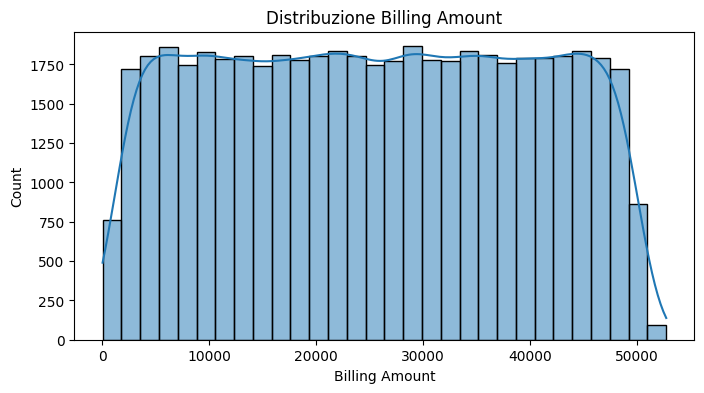

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Istogramma Billing Amount
plt.figure(figsize=(8,4))
sns.histplot(df['Billing Amount'], bins=30, kde=True)
plt.title('Distribuzione Billing Amount')
plt.xlabel('Billing Amount')
plt.ylabel('Count')
plt.show()

La distribuzione di Billing Amount è abbastanza uniforme tra 0 e 50.000, senza evidenti picchi o concentrazioni. Questo indica che non ci sono outlier marcati e i valori sono ben distribuiti sull’intervallo.

## Encoding

Le variabili Age, Gender, Blood Type, Medical Condition, Admission Type e Medication sono importanti per la predizione di Test Results, in quanto rappresentano caratteristiche cliniche e anagrafiche rilevanti e facilmente interpretabili.

Per poterle utilizzare nei modelli di machine learning, le variabili categoriche devono essere trasformate in numeri tramite encoding.
Viene utilizzato il One Hot Encoding sulle feature categoriche scelte, perché hanno tutte poche categorie e non presentano un ordine naturale: questo metodo evita di introdurre relazioni spurie tra le categorie.

Per la variabile target (Test Results) viene usato, invece, il Label Encoding, così da fornire un’etichetta numerica univoca a ciascuna classe da predire.

### Categorizzazione della colonna età

In [ ]:
import pandas as pd

# Seleziona solo le colonne di interesse
cols_to_use = ['Age', 'Gender', 'Blood Type', 'Medical Condition',
               'Admission Type', 'Medication', 'Test Results']
nuovo_df = df[cols_to_use].copy()

# Categorizza la colonna Age
bins = [12, 24, 38, 59, 86]
labels = ['Giovani', 'Adulti', 'Mezza_Età', 'Anziani']
nuovo_df['Age'] = pd.cut(nuovo_df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)


L'età è divisa ora nelle seguenti fasce:
- Da 13 a 24: Giovani
- Da 25 a 38: Adulti
- Da 39 a 59: Mezza età
- Da 60 a 86: Anziani

Il codice successivo mostra i valori unici di alcune feature per decidere come dividerli in categorie per il one hot encoding.

In [ ]:
columns = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Insurance Provider']
for col in columns:
    print(f"\nValori unici di {col}:")
    print(df[col].unique())


Valori unici di Gender:
['Male', 'Female']
Categories (2, object): ['Female', 'Male']

Valori unici di Blood Type:
['B-', 'A+', 'A-', 'O+', 'AB+', 'AB-', 'B+', 'O-']
Categories (8, object): ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']

Valori unici di Medical Condition:
['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension', 'Arthritis']
Categories (6, object): ['Arthritis', 'Asthma', 'Cancer', 'Diabetes', 'Hypertension', 'Obesity']

Valori unici di Admission Type:
['Urgent', 'Emergency', 'Elective']
Categories (3, object): ['Elective', 'Emergency', 'Urgent']

Valori unici di Medication:
['Paracetamol', 'Ibuprofen', 'Aspirin', 'Penicillin', 'Lipitor']
Categories (5, object): ['Aspirin', 'Ibuprofen', 'Lipitor', 'Paracetamol', 'Penicillin']

Valori unici di Insurance Provider:
['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']


### One Hot Encoding
Consiste nel dividere la colonna di interesse in più colonne binarie, ognuna delle quali rappresentativa di un valore specifico della colonna originaria.
Verrà effettuato sulle feature: Age, Gender, Blood Type, Medical Condition, Admission Type e Medication.

In [ ]:
print(nuovo_df.columns)

# Colonne da encodare
cols_to_encode = [
    'Age',
    'Gender',
    'Blood Type',
    'Medical Condition',
    'Admission Type',
    'Medication'
]

# One-hot encoding SENZA drop_first (così hai tutte le colonne)
nuovo_df = pd.get_dummies(nuovo_df, columns=cols_to_encode, prefix_sep='_', drop_first=False,  dtype=int)

# Visualizza le nuove colonne
nuovo_df


Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Admission Type',
       'Medication', 'Test Results'],
      dtype='object')


,Test Results,Age_Giovani,Age_Adulti,Age_Mezza_Età,Age_Anziani,Gender_Female,Gender_Male,Blood Type_A+,Blood Type_A-,Blood Type_AB+,...,Medical Condition_Hypertension,Medical Condition_Obesity,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,Normal,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,Inconclusive,0,0,0,1,0,1,1,0,0,...,0,1,0,1,0,0,1,0,0,0
2,Normal,0,0,0,1,1,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
3,Abnormal,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,Abnormal,0,0,1,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50208,Abnormal,0,0,0,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
50209,Inconclusive,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
50210,Inconclusive,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
50211,Inconclusive,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


### Label Encoding
Verrà effettuato sulla variabile target Test Results. Consiste nel mappare i valori categorici della feature in un range numerico, in questo caso mapperemo Inconclusive a 0, Normal a 1 e Abnormal a 2.

In [ ]:
# Mappatura manuale dei valori target
mapping = {
    'Inconclusive': 0,
    'Normal': 1,
    'Abnormal': 2
}

# Applica la mappatura
nuovo_df['Test_Results_enc'] = nuovo_df['Test Results'].map(mapping)

# Rimuove la colonna originale
nuovo_df = nuovo_df.drop(columns=['Test Results'])

# Visualizza le prime righe
display(nuovo_df.head())


,Age_Giovani,Age_Adulti,Age_Mezza_Età,Age_Anziani,Gender_Female,Gender_Male,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,...,Medical Condition_Obesity,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Test_Results_enc
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,0,0,1,0,1,1,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,0,0,0,1,1,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1
3,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,2
4,0,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,2


### Feature Selection: ANOVA F-test
Il test ANOVA (Analysis of Variance) è un metodo statistico che serve a confrontare le medie di due o più gruppi. Nel contesto della feature selection, si usa per capire se c'è una relazione significativa tra una variabile numerica (la feature) e una variabile categorica (il target).

Nel nostro caso viene utilizzato il test di ANOVA per capire quali colonne hanno la maggiore forza predittiva nei confronti dell'attributo target Test Results.


In [ ]:
from sklearn.feature_selection import f_classif
import pandas as pd

# Escludi queste colonne da X
exclude_cols = ['Test_Results_enc']

# X = tutte le colonne tranne quelle escluse
X = nuovo_df.drop(columns=exclude_cols)

# y = solo la colonna "Test Results"
y = nuovo_df['Test_Results_enc']

f_values, p_values = f_classif(X, y)

# Puoi creare una tabella ordinata:
anova_df = pd.DataFrame({'Feature': X.columns, 'F-Value': f_values, 'p-Value': p_values})
anova_df.sort_values('F-Value', ascending=False, inplace=True)

display(anova_df)



,Feature,F-Value,p-Value
15,Medical Condition_Asthma,3.614737,0.026931
14,Medical Condition_Arthritis,2.398591,0.090856
1,Age_Adulti,2.045781,0.129290
18,Medical Condition_Hypertension,1.529547,0.216644
0,Age_Giovani,1.406111,0.245104
10,Blood Type_B+,1.391399,0.248737
2,Age_Mezza_Età,1.259454,0.283818
9,Blood Type_AB-,1.152926,0.315720
25,Medication_Lipitor,1.091579,0.335694
3,Age_Anziani,0.714408,0.489487


L'F-value è un valore che varia nel range [0;∞). Un valore prossimo allo 0, o comunque molto basso, indica che la variabile in esame non ha forza predittiva nei confronti della Y. Il p-value invece è un valore che varia nell'intervallo [0;1] e rappresenta la probabilità che l'associazione sia dovuta al caso.
Nel caso specifico i valori risultanti sono bassissimi per l'F value indicando una bassa correlazione tra feature e variabile target.

In [ ]:
# Seleziona solo le feature con p-value < 0.05
anova_significative = anova_df[anova_df['p-Value'] < 0.05]

# Ordina per F-Value in modo decrescente
anova_significative = anova_significative.sort_values('F-Value', ascending=False)

display(anova_significative)

,Feature,F-Value,p-Value
15,Medical Condition_Asthma,3.614737,0.026931


Il p-value è statisticamente significativo solo quando è inferiore a 0.05. In questo caso risulta un solo valore che supera tale controllo, e questo è indice del fatto che la maggior parte dei dati a disposizione non saranno discriminanti nella predizione della Y.
Nel caso specifico, il fatto che ci sia una sola colonna statisticamente significativa, mentre le altre non lo sono, è molto probabilmente un'eccezione casuale alla situazione generale del dataset.

## Statistiche sulle variabili dopo l'encoding

In [ ]:
# Calcola la media solo sulle colonne numeriche (esclude 'Name' e simili)
nuovo_df.describe(include=['number'])

,Age_Giovani,Age_Adulti,Age_Mezza_Età,Age_Anziani,Gender_Female,Gender_Male,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,...,Medical Condition_Hypertension,Medical Condition_Obesity,Admission Type_Elective,Admission Type_Emergency,Admission Type_Urgent,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
count,50117.000000,50117.000000,50117.000000,50117.000000,50117.000000,50117.000000,50117.000000,50117.000000,50117.000000,50117.000000,...,50117.000000,50117.000000,50117.000000,50117.000000,50117.000000,50117.000000,50117.000000,50117.000000,50117.000000,50117.000000
mean,0.103119,0.204601,0.310693,0.381587,0.500170,0.499830,0.124888,0.125367,0.125786,0.125127,...,0.166311,0.165792,0.336672,0.327833,0.335495,0.199892,0.199992,0.200690,0.199533,0.199892
std,0.304117,0.403414,0.462782,0.485781,0.500005,0.500005,0.330595,0.331137,0.331611,0.330866,...,0.372363,0.371898,0.472576,0.469428,0.472168,0.399923,0.399998,0.400521,0.399653,0.399923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Osservando la deviazione standard, si vede come la maggior parte delle persone rientra nelle categorie "Mezza Età" e "Anziani". Per quanto riguarda il resto delle colonne, invece, la situazione è perfettamente bilanciata.

### Grafici a barre

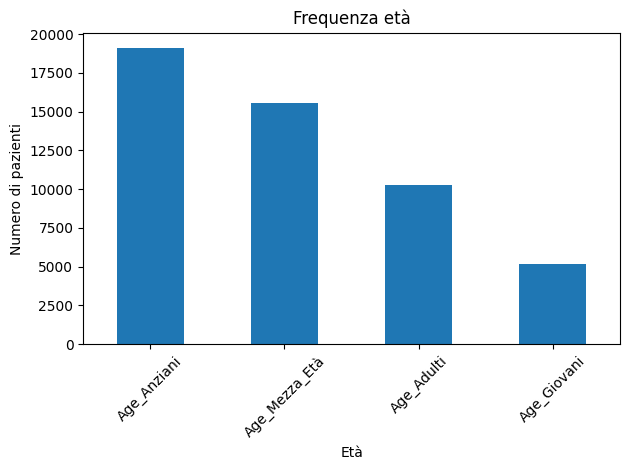

In [ ]:
# Trova tutte le colonne che iniziano con "Age"
age_cols = [col for col in nuovo_df.columns if col.startswith('Age')]

# Calcola la frequenza di ciascun gruppo sanguigno (sommando i "1")
age_counts = nuovo_df[age_cols].sum().sort_values(ascending=False)

# Barplot unico
age_counts.plot(kind='bar')
plt.title('Frequenza età')
plt.ylabel('Numero di pazienti')
plt.xlabel('Età')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Il grafico è ancora più esplicativo della situazione. rappresentando quella che è la natura di molti dati sanitari dove la maggioranza dei pazienti ha un'età più avanzata.

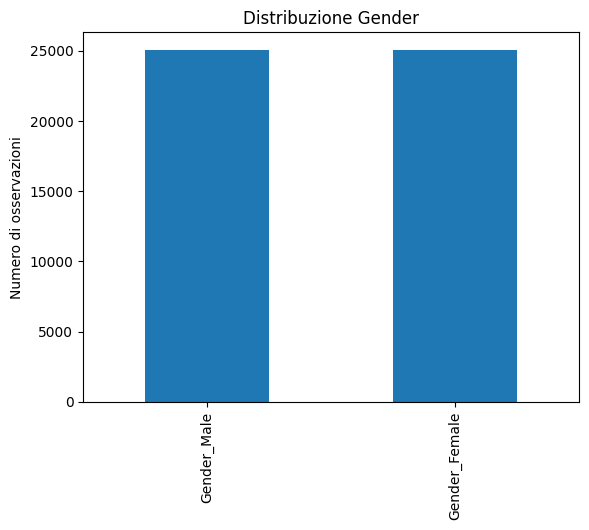

In [ ]:
# Esempio: istogramma per le categorie Gender
nuovo_df[['Gender_Male','Gender_Female']].sum().plot(kind='bar')
plt.title('Distribuzione Gender')
plt.ylabel('Numero di osservazioni')
plt.show()

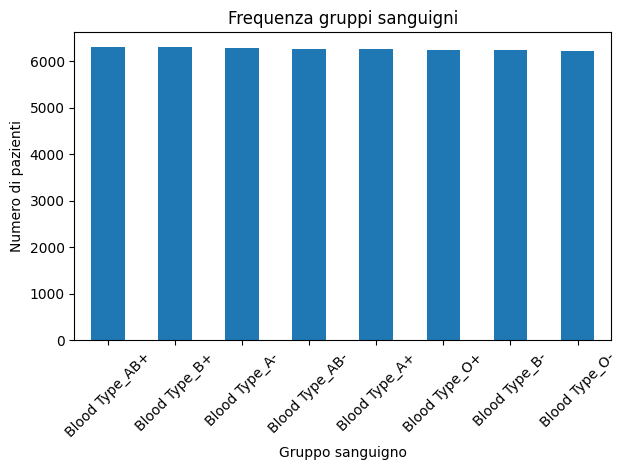

In [ ]:
# Trova tutte le colonne che iniziano con "Blood Type"
blood_cols = [col for col in nuovo_df.columns if col.startswith('Blood Type')]

# Calcola la frequenza di ciascun gruppo sanguigno (sommando i "1")
blood_counts = nuovo_df[blood_cols].sum().sort_values(ascending=False)

# Barplot unico
blood_counts.plot(kind='bar')
plt.title('Frequenza gruppi sanguigni')
plt.ylabel('Numero di pazienti')
plt.xlabel('Gruppo sanguigno')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

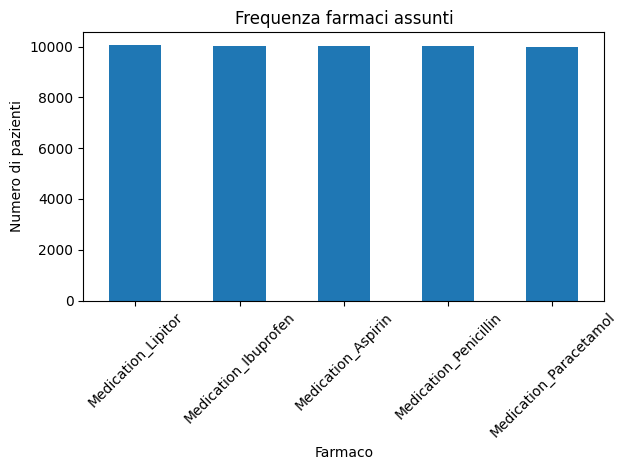

In [ ]:
# Trova tutte le colonne che rappresentano i farmaci (Medication)
medication_cols = [col for col in nuovo_df.columns if col.startswith('Medication')]

# Frequenza di ogni farmaco (somma dei "1")
medication_counts = nuovo_df[medication_cols].sum().sort_values(ascending=False)

medication_counts.plot(kind='bar')
plt.title('Frequenza farmaci assunti')
plt.ylabel('Numero di pazienti')
plt.xlabel('Farmaco')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

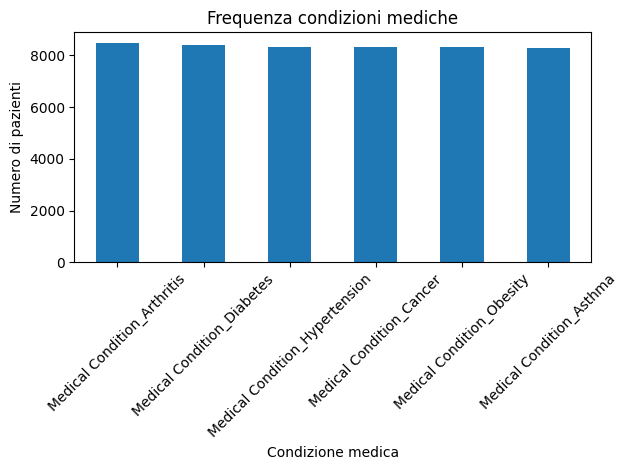

In [ ]:
# Trova tutte le colonne che rappresentano condizioni mediche
condition_cols = [col for col in nuovo_df.columns if col.startswith('Medical Condition')]

# Frequenza di ogni condizione (somma dei "1")
condition_counts = nuovo_df[condition_cols].sum().sort_values(ascending=False)

condition_counts.plot(kind='bar')
plt.title('Frequenza condizioni mediche')
plt.ylabel('Numero di pazienti')
plt.xlabel('Condizione medica')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

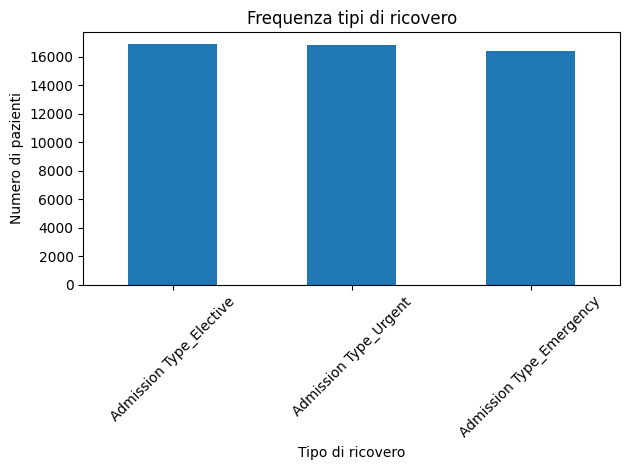

In [ ]:
# Trova tutte le colonne che rappresentano i tipi di ricovero
admission_cols = [col for col in nuovo_df.columns if col.startswith('Admission Type')]

# Frequenza di ogni tipo di ricovero (somma dei "1")
admission_counts = nuovo_df[admission_cols].sum().sort_values(ascending=False)

admission_counts.plot(kind='bar')
plt.title('Frequenza tipi di ricovero')
plt.ylabel('Numero di pazienti')
plt.xlabel('Tipo di ricovero')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dall’analisi statistica delle variabili numeriche dopo l’encoding, emerge che il dataset è ben bilanciato e privo di valori mancanti. In particolare, la distribuzione per genere è pressoché equa, come si evince dalle medie delle colonne Gender_Female e Gender_Male, entrambe prossime a 0.5. Lo stesso bilanciamento si riscontra tra le diverse tipologie di ricovero (Admission Type_Elective, Emergency, Urgent), ognuna delle quali rappresenta circa un terzo delle osservazioni.

Le variabili relative ai gruppi sanguigni e alle condizioni mediche/farmaci sono state codificate in formato binario. Le medie di queste colonne esprimono la proporzione della presenza di ciascuna caratteristica all’interno del dataset. Ad esempio, circa il 16,5% degli individui è affetto da obesità, mentre ogni gruppo sanguigno e ogni farmaco presentano percentuali simili tra loro, senza evidenziare forti squilibri.

Complessivamente, il dataset si presenta bilanciato in ogni variabile. Come evidenziato dal test di ANOVA, questa caratteristica però non è necessariamente un aspetto positivo.

## Statistica descrittiva multivariata
 In questa sezione analizzeremo la matrice di correlazione per valutare le relazioni tra le variabili in
 esame. Il nostro obiettivo è individuare eventuali associazioni tra le variabili, verificando se esistono legami
 significativi che possano influenzare l’interpretazione dei dati. Questo ci permetterà di comprendere meglio
 la struttura del dataset e di trarre spunti utili per le analisi successive.

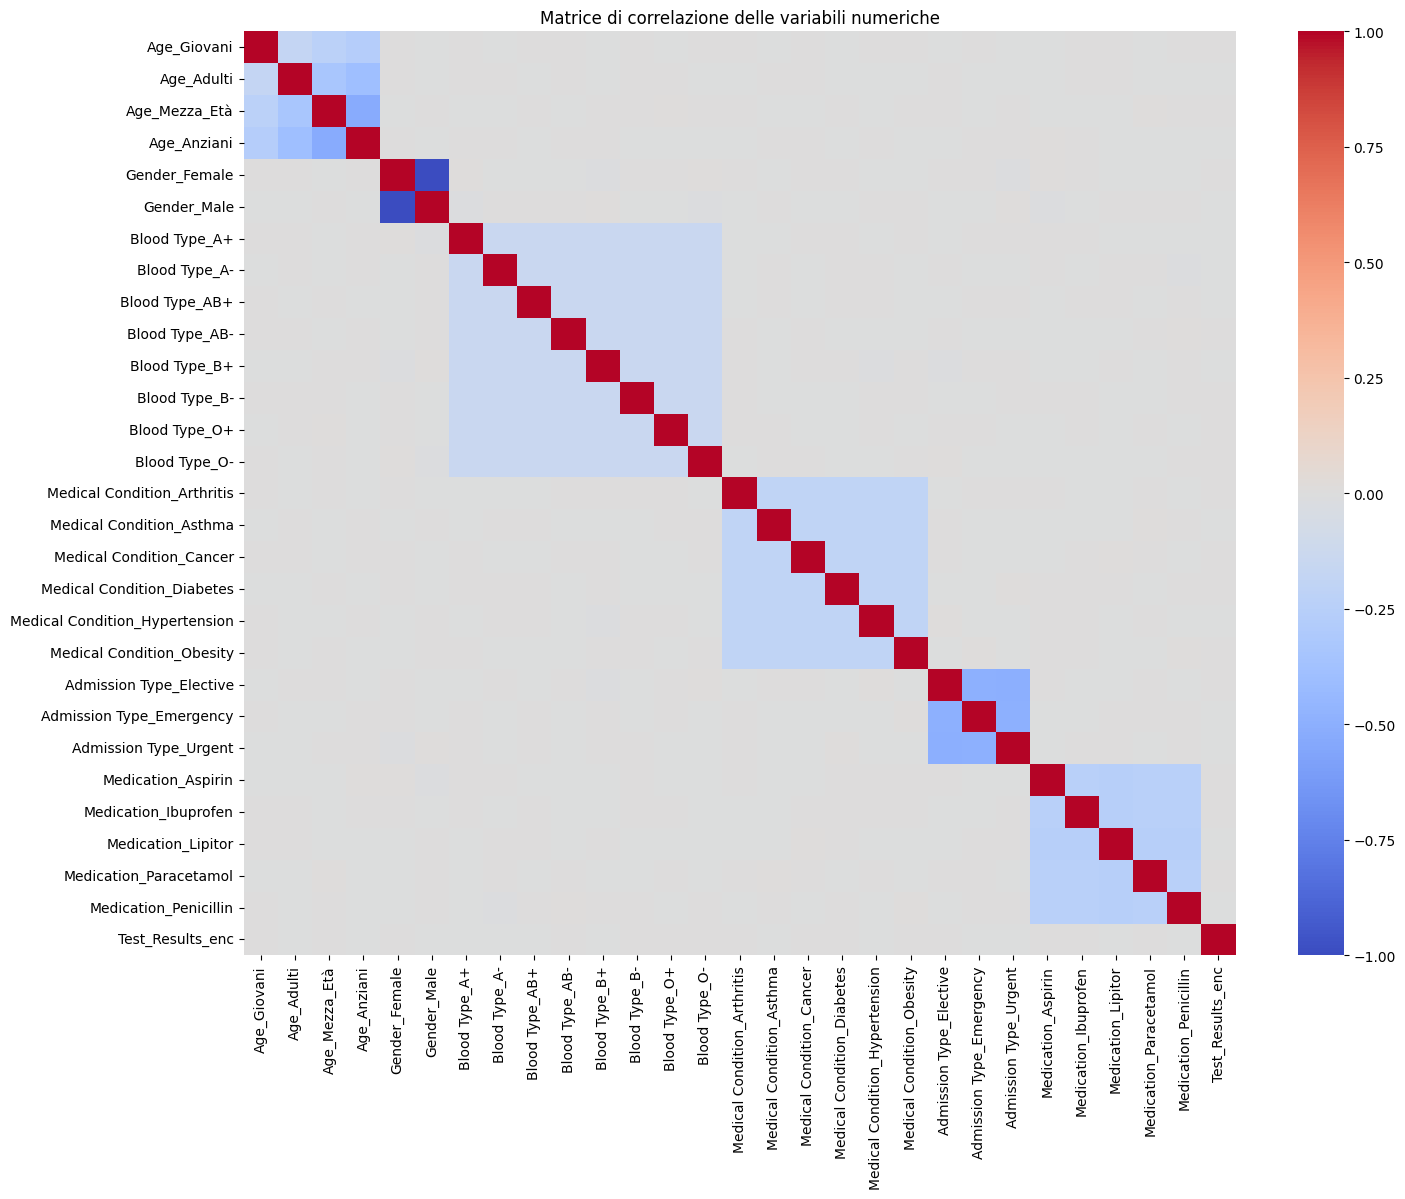

In [ ]:
# Visualizzazione con una heatmap
corr_matrix=nuovo_df.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Matrice di correlazione delle variabili numeriche')
plt.show()

##Risposta alla RQ1: Quali fattori influenzano maggiormente l'esito dei test clinici (Test Results)?

In una matrice di correlazione, la heatmap utilizza una scala di colori per rappresentare l'intensità della relazione tra le variabili.

La heatmap mostra che la maggior parte delle variabili numeriche non presenta forti correlazioni tra loro: la matrice è quasi tutta grigia, cioè vicina a zero.

Le uniche correlazioni evidenti (in blu) sono tra variabili mutuamente esclusive (ad esempio tra diverse fasce di età o tra i diversi gruppi sanguigni), che mostrano una correlazione negativa, come è atteso dopo l’encoding.  
Non si osservano correlazioni rilevanti tra le feature e la variabile target (“Test_Results_enc”). In sintesi: non ci sono relazioni forti o particolari pattern tra le variabili del dataset.

In [ ]:
# Estrai la correlazione rispetto alla variabile target (Test_Results_enc)
corr_target = corr_matrix['Test_Results_enc'].sort_values(ascending=False)

corr_target

,Test_Results_enc
Test_Results_enc,1.000000
Medical Condition_Arthritis,0.004781
Admission Type_Elective,0.003921
Medical Condition_Obesity,0.003816
Blood Type_AB-,0.003738
Blood Type_O+,0.003530
Medication_Aspirin,0.003253
Age_Giovani,0.001872
Blood Type_O-,0.001849
Medical Condition_Diabetes,0.001741


La correlazione nei confronti della variabile target è sostanzialmente nulla. Questa valutazione conferma quanto detto in precedenza con il test di ANOVA.

# Machine Learning
In questa fase, usiamo algoritmi come la Random Forest e la Logistic Regression che imparano dai dati esistenti a riconoscere i pattern e a fare una previsione su "Test Results". L'obiettivo è costruire un modello che, una volta addestrato, sia in grado di indovinare correttamente i risultati anche su dati che non ha mai visto.

 ### Creazione del test e validation set
 Viene utilizzato il rapporto 80% (grandezza del Train set) a 20% (grandezza del Test Set) rispetto alla grandezza totale del dataset.

Il Train set è quello che il modello usa per imparare a fare previsioni, mentre il Test set è una parte di dati che il modello non ha mai visto e che usiamo per capire se le sue previsioni sono affidabili. Questo è fondamentale per garantire che il modello sia in grado di generalizzare e fare previsioni corrette anche su nuovi dati, e non solo su quelli che ha già studiato.

In [ ]:
from sklearn.model_selection import train_test_split
X = nuovo_df.drop(columns=['Test_Results_enc'])
y = nuovo_df['Test_Results_enc']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Random Forest

La Random Forest è un algoritmo di machine learning supervisionato che combina molti alberi decisionali, ciascuno addestrato su campioni diversi del dataset e su sottoinsiemi casuali delle feature. In questo modo, la Random Forest riesce a migliorare la precisione rispetto a un singolo albero e a ridurre il rischio di overfitting.
Nel nostro caso, stiamo usando la Random Forest per prevedere il risultato del test (“Test_Result_enc”) a partire da molteplici caratteristiche (feature) dei dati. Grazie alla sua robustezza e flessibilità, la Random Forest è particolarmente adatta a problemi come il nostro, dove ci sono molte feature, alcune delle quali categoriche e codificate, e diverse classi di output.

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Training modello
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Valutazione
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.33      0.33      3314
           1       0.33      0.32      0.33      3344
           2       0.33      0.34      0.33      3366

    accuracy                           0.33     10024
   macro avg       0.33      0.33      0.33     10024
weighted avg       0.33      0.33      0.33     10024



Il modello non riesce a distinguere tra le classi target meglio di una scelta casuale su 3 valori.
Tutte le metriche sono molto basse e simili tra le classi, il che indica:

- nessuna combinazione delle feature disponibili permette di prevedere la variabile target in modo efficace.  
- il modello non sta imparando pattern utili dai dati.  


Questo dataset, essendo completamente bilanciato e privo di qualsiasi correlazione tra le feature e la variabile target, rappresenta un ottimo esempio didattico. Mostra come, in assenza di pattern o relazioni reali nei dati, anche i migliori algoritmi di machine learning non sono in grado di apprendere o prevedere efficacemente la variabile di interesse.

In altre parole, la qualità e la struttura dei dati sono fondamentali: senza informazioni davvero utili nei dati, nessun modello potrà mai raggiungere buone performance predittive.

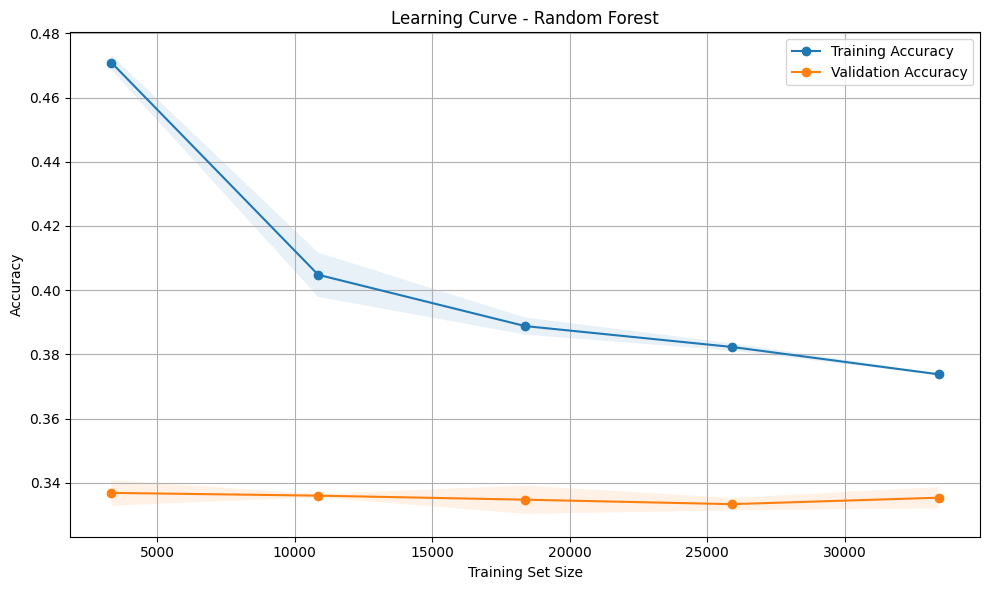

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
import numpy as np
clf = RandomForestClassifier(n_estimators=30, max_depth=5, random_state=42)

train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    shuffle=True,
    random_state=42
)

# 2. Calcolo media e std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 3. Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)

plt.plot(train_sizes, test_mean, 'o-', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Random Forest')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()


La curva mostra l’andamento dell’accuratezza su training set (blu) e validation set (arancione) al variare della dimensione del training set.

Il grafico dimostra visivamente che, anche aumentando la quantità di dati, il modello non migliora se non ci sono informazioni utili nelle feature.

La learning curve mostra chiaramente che la validazione rimane piatta vicino al valore casuale, confermando che nessuna delle feature disponibili contiene informazioni utili per prevedere la variabile target. Questo esempio sottolinea l’importanza della qualità e della struttura dei dati nel machine learning: senza pattern reali nei dati, nessun algoritmo può apprendere o generalizzare.

### Regressione Logistica

La regressione logistica è un modello di classificazione supervisionato utilizzato per prevedere l’appartenenza di un’osservazione a una o più classi. Nel caso multiclass, utilizza la funzione softmax per distinguere tra più di due categorie.
Nel nostro caso, abbiamo utilizzato la regressione logistica per predire la variabile Test_Result_enc, che rappresenta tre possibili esiti: Inconclusive (0), Normal (1) e Abnormal (2), sulla base delle altre feature del dataset.



In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.20      0.25      3314
           1       0.33      0.36      0.34      3344
           2       0.33      0.44      0.38      3366

    accuracy                           0.33     10024
   macro avg       0.33      0.33      0.32     10024
weighted avg       0.33      0.33      0.32     10024



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Dai risultati si osserva che la regressione logistica non sta riuscendo a distinguere tra le tre classi:

- la precision, recall e f1-score per tutte le classi sono circa 0.33, ovvero il valore che ci si aspetterebbe da una classificazione casuale tra tre classi bilanciate.
- l’accuracy complessiva è 0.33, molto bassa e in linea con una scelta casuale.

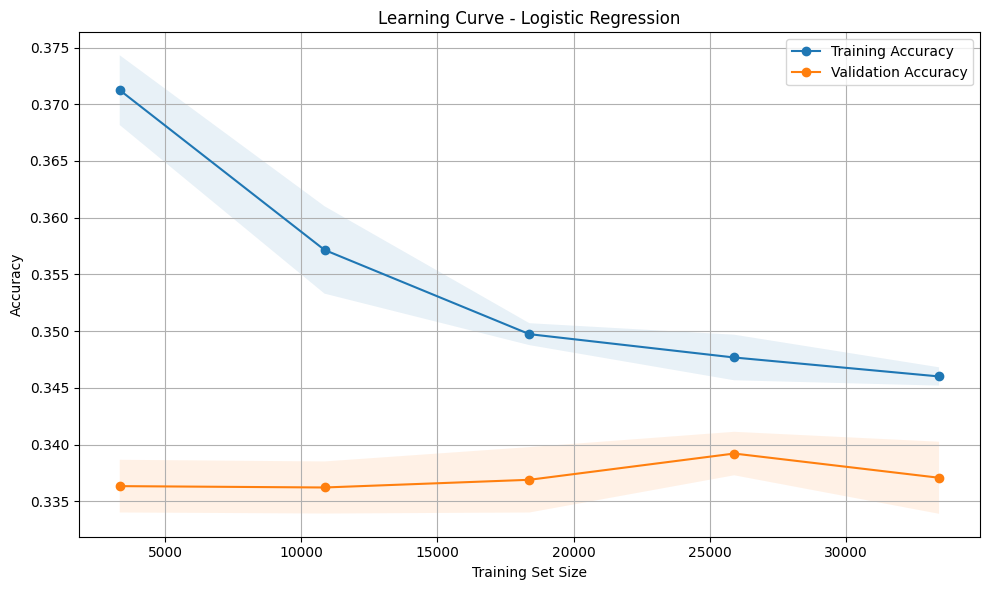

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

clf = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    shuffle=True,
    random_state=42
)

# Calcolo media e std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)

plt.plot(train_sizes, test_mean, 'o-', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Logistic Regression')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

L’accuratezza sul training set parte più alta ma diminuisce all’aumentare dei dati, stabilizzandosi attorno a 0.345.

L’accuratezza sul validation set resta stabile e bassa indipendentemente dalla dimensione del training set.

Il gap tra training e validation accuracy è molto ridotto, indice che il modello non sta overfittando.

La regressione logistica non riesce a catturare relazioni significative nei dati: sia l’accuratezza in training che in validation sono basse e vicine tra loro, il che è segno di underfitting.

## Support Vector Machine (SVM)

L’algoritmo SVM è un modello di classificazione supervisionato che cerca di trovare le “frontiere” che separano al meglio le diverse classi nei dati. Nel nostro caso, utilizziamo SVM per cercare di distinguere tra le tre possibili classi del test (“Test_Result_enc”), sfruttando tutte le feature disponibili. SVM è particolarmente efficace quando le classi sono separabili da confini netti, ma può diventare meno efficiente se i dati non presentano pattern chiari.



In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=42, max_iter=5000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.20      0.25      3314
           1       0.33      0.36      0.34      3344
           2       0.33      0.44      0.38      3366

    accuracy                           0.33     10024
   macro avg       0.33      0.33      0.32     10024
weighted avg       0.33      0.33      0.32     10024



Anche in questo caso, il classificatore SVM mostra prestazioni molto basse:

- accuracy: 0.33, ovvero circa il valore che ci si aspetta da una classificazione casuale su tre classi.

- precision, recall e f1-score sono molto simili per tutte le classi e vicini al valore casuale (~0.33).

- le metriche macro e weighted average confermano che il modello non sta imparando alcuna relazione significativa tra le feature e la variabile da predire.

Come per la regressione logistica, anche con SVM il modello non riesce a distinguere tra le tre classi. Questo suggerisce che le feature disponibili non contengono informazioni utili per la classificazione.

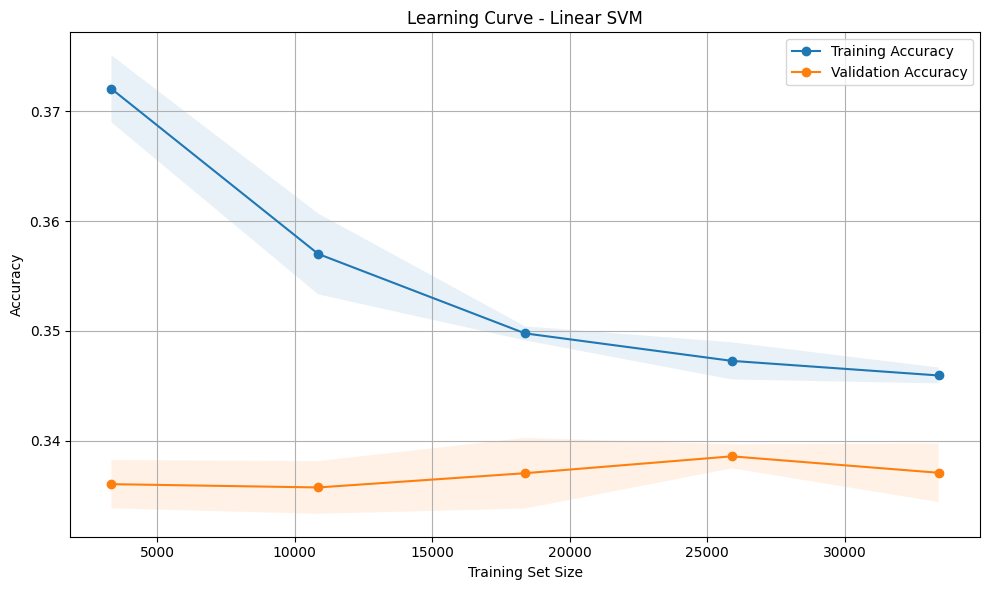

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt

clf = LinearSVC(random_state=42, max_iter=5000)

train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    shuffle=True,
    random_state=42
)

# Calcolo media e std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)

plt.plot(train_sizes, test_mean, 'o-', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Linear SVM')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

La curva mostra che la SVM non riesce ad apprendere pattern utili: l’accuratezza su training e validation resta bassa e vicina al caso (circa 0.33), con un gap minimo tra le due curve. È un chiaro esempio di underfitting dovuto all’assenza di informazioni predittive nei dati.

## Naive Bayes

Il Naive Bayes è un classificatore probabilistico che si basa sul teorema di Bayes, assumendo che le feature siano indipendenti tra loro (ipotesi “naive”). Nel nostro scenario, applichiamo Naive Bayes per stimare la probabilità che ciascun esempio appartenga a una delle tre classi (“Test_Result_enc”), usando le informazioni contenute nelle feature. È un modello semplice e veloce, particolarmente adatto quando le feature sono realmente indipendenti e il dataset è ampio.

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.30      0.32      3314
           1       0.33      0.34      0.33      3344
           2       0.33      0.35      0.34      3366

    accuracy                           0.33     10024
   macro avg       0.33      0.33      0.33     10024
weighted avg       0.33      0.33      0.33     10024



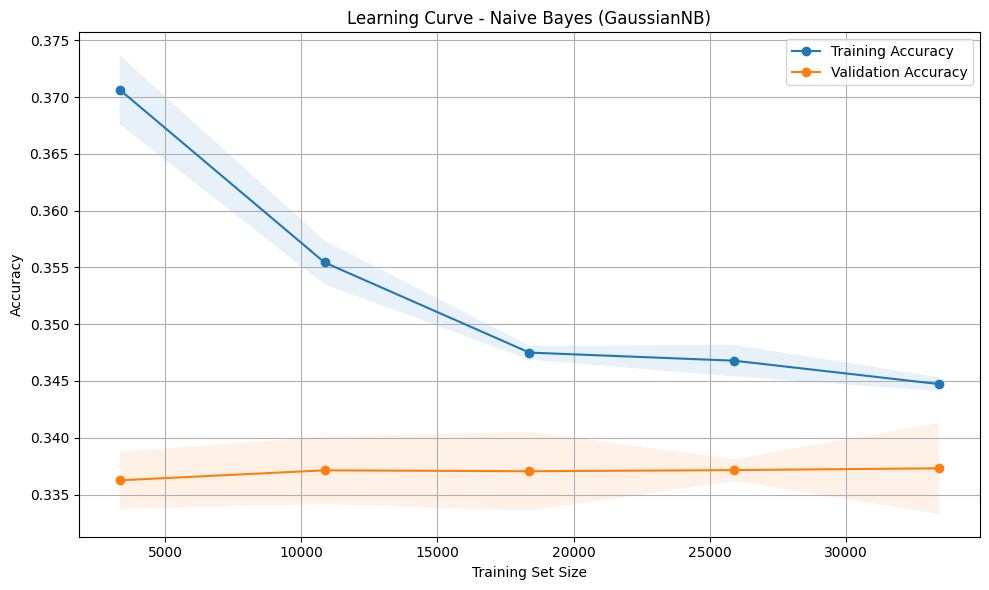

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt

clf = GaussianNB()

train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    shuffle=True,
    random_state=42
)

# Calcolo media e std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)

plt.plot(train_sizes, test_mean, 'o-', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - Naive Bayes (GaussianNB)')
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

La curva conferma che anche il Naive Bayes non apprende pattern utili: la validation accuracy resta costante e vicino al caso (~0.33), segno di underfitting e dati non informativi.

I risultati ottenuti con accuracy e metriche f1-score sempre intorno al 33% per tutti i modelli dimostrano che, in assenza di vere relazioni tra feature e target, nessun algoritmo riesce a performare meglio del caso.

Questo scenario sottolinea che anche i modelli più avanzati sono impotenti di fronte a dati privi di pattern: il processo di apprendimento fallisce perché non ci sono regole o segnali statistici da cogliere. Ne deriva che, nella pratica, la fase di analisi e preparazione dei dati (feature engineering, selezione di variabili significative, raccolta di dati realmente informativi) è spesso decisiva per il successo di qualsiasi progetto di machine learning, molto più della scelta del modello stesso.

##Grid Search

La **Grid Search** è una tecnica di ottimizzazione degli iperparametri usata nel machine learning.

In breve:

* Si definisce una **griglia di possibili valori** per gli iperparametri di un modello (es. numero di alberi, profondità massima, valore di C in SVM).
* L’algoritmo prova **tutte le combinazioni possibili** di quei valori.
* Per ciascuna combinazione, il modello viene **addestrato e valutato** (tipicamente con cross-validation).
* Alla fine, viene scelta la configurazione di iperparametri che produce le **migliori prestazioni**.

È molto accurata ma può essere costosa computazionalmente, soprattutto se la griglia è grande.


Nel nostro caso verranno messi a confronto i risultati prodotti dai modelli di ML precedentemente utilizzati con quelli prodotti dalla Grid Search per vedere se questa tecnica produrrà dei miglioramenti.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("="*60)
print("GRID SEARCH - OTTIMIZZAZIONE HYPERPARAMETER")
print("="*60)

# 1. BASELINE RESULTS - Calcolo accuracy dei modelli attuali
print("\n1. CALCOLO BASELINE (modelli con parametri default)")
print("-"*50)

baseline_results = {}

# Random Forest baseline
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)
rf_pred_baseline = rf_baseline.predict(X_test)
baseline_results['Random Forest'] = accuracy_score(y_test, rf_pred_baseline)
print(f"Random Forest (default): {baseline_results['Random Forest']:.4f}")

# Logistic Regression baseline
lr_baseline = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
lr_baseline.fit(X_train, y_train)
lr_pred_baseline = lr_baseline.predict(X_test)
baseline_results['Logistic Regression'] = accuracy_score(y_test, lr_pred_baseline)
print(f"Logistic Regression (default): {baseline_results['Logistic Regression']:.4f}")

# SVM baseline
svm_baseline = LinearSVC(random_state=42, max_iter=5000)
svm_baseline.fit(X_train, y_train)
svm_pred_baseline = svm_baseline.predict(X_test)
baseline_results['LinearSVC'] = accuracy_score(y_test, svm_pred_baseline)
print(f"LinearSVC (default): {baseline_results['LinearSVC']:.4f}")

# Naive Bayes baseline
nb_baseline = GaussianNB()
nb_baseline.fit(X_train, y_train)
nb_pred_baseline = nb_baseline.predict(X_test)
baseline_results['Naive Bayes'] = accuracy_score(y_test, nb_pred_baseline)
print(f"Naive Bayes (default): {baseline_results['Naive Bayes']:.4f}")

GRID SEARCH - OTTIMIZZAZIONE HYPERPARAMETER

1. CALCOLO BASELINE (modelli con parametri default)
--------------------------------------------------
Random Forest (default): 0.3305


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression (default): 0.3313
LinearSVC (default): 0.3315
Naive Bayes (default): 0.3295


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 2. GRID SEARCH - Definizione parametri
print("\n\n2. GRID SEARCH - OTTIMIZZAZIONE PARAMETRI")
print("-"*50)

# Parametri per Random Forest (range più ampio ma con sampling casuale)
rf_param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None] + list(range(5, 21, 5)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}


# Parametri per Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 2000, 3000],
    'solver': ['lbfgs', 'liblinear']
}

# Parametri per LinearSVC
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [3000, 5000, 10000],
    'loss': ['hinge', 'squared_hinge']
}

# Parametri per Naive Bayes (meno parametri da ottimizzare)
nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}



2. GRID SEARCH - OTTIMIZZAZIONE PARAMETRI
--------------------------------------------------


Tenuto conto del costo compuatazionale che una ricerca esaustiva può avere se applicata alla Random Forest, verrà usata la Randomized Search, che esplora solo un sottoinsieme casuale delle combinazioni di iperparametri riducendo il costo computazionale.

Per gli altri modelli (Regressione Logistica, SVM e Naive Bayes) è stata invece applicata la Grid Search, che testa in modo esaustivo tutte le combinazioni definite nella griglia, garantendo una ricerca completa ma più dispendiosa in termini di tempo di calcolo.

In [ ]:
# 3. ESECUZIONE GRID SEARCH
print("\nEsecuzione Grid Search (può richiedere alcuni minuti)")

optimized_results = {}
best_models = {}

# Random Forest Randomized Search
print("\n🔍 Random Forest Randomized Search...")
rf_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_dist,
    n_iter=30,              # numero di combinazioni casuali da provare
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
rf_search.fit(X_train, y_train)
rf_pred_optimized = rf_search.predict(X_test)
optimized_results['Random Forest'] = accuracy_score(y_test, rf_pred_optimized)
best_models['Random Forest'] = rf_search.best_estimator_
print(f"Best params: {rf_search.best_params_}")
print(f"Best CV score: {rf_search.best_score_:.4f}")

# Logistic Regression Grid Search
print("\n🔍 Logistic Regression Grid Search...")
lr_grid = GridSearchCV(
    LogisticRegression(multi_class='multinomial', random_state=42),
    lr_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
lr_grid.fit(X_train, y_train)
lr_pred_optimized = lr_grid.predict(X_test)
optimized_results['Logistic Regression'] = accuracy_score(y_test, lr_pred_optimized)
best_models['Logistic Regression'] = lr_grid.best_estimator_
print(f"Best params: {lr_grid.best_params_}")
print(f"Best CV score: {lr_grid.best_score_:.4f}")

# LinearSVC Grid Search
print("\n🔍 LinearSVC Grid Search...")
svm_grid = GridSearchCV(
    LinearSVC(random_state=42),
    svm_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
svm_grid.fit(X_train, y_train)
svm_pred_optimized = svm_grid.predict(X_test)
optimized_results['LinearSVC'] = accuracy_score(y_test, svm_pred_optimized)
best_models['LinearSVC'] = svm_grid.best_estimator_
print(f"Best params: {svm_grid.best_params_}")
print(f"Best CV score: {svm_grid.best_score_:.4f}")

# Naive Bayes Grid Search
print("\n🔍 Naive Bayes Grid Search...")
nb_grid = GridSearchCV(
    GaussianNB(),
    nb_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
nb_grid.fit(X_train, y_train)
nb_pred_optimized = nb_grid.predict(X_test)
optimized_results['Naive Bayes'] = accuracy_score(y_test, nb_pred_optimized)
best_models['Naive Bayes'] = nb_grid.best_estimator_
print(f"Best params: {nb_grid.best_params_}")
print(f"Best CV score: {nb_grid.best_score_:.4f}")


Esecuzione Grid Search (può richiedere alcuni minuti)

🔍 Random Forest Randomized Search...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 270}
Best CV score: 0.3324

🔍 Logistic Regression Grid Search...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1267, in fit
    multi_class = _check_

Best params: {'C': 10, 'max_iter': 1000, 'solver': 'lbfgs'}
Best CV score: 0.3353

🔍 LinearSVC Grid Search...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'C': 1, 'loss': 'squared_hinge', 'max_iter': 3000}
Best CV score: 0.3355

🔍 Naive Bayes Grid Search...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params: {'var_smoothing': 1e-09}
Best CV score: 0.3338


In [ ]:
# 4. CONFRONTO RISULTATI
print("\n\n4. CONFRONTO RISULTATI: BASELINE vs OTTIMIZZATI")
print("="*60)

comparison_df = pd.DataFrame({
    'Baseline': baseline_results,
    'Ottimizzato': optimized_results
})
comparison_df['Miglioramento'] = comparison_df['Ottimizzato'] - comparison_df['Baseline']
comparison_df['Miglioramento %'] = (comparison_df['Miglioramento'] / comparison_df['Baseline']) * 100

print(comparison_df.round(4))



4. CONFRONTO RISULTATI: BASELINE vs OTTIMIZZATI
                     Baseline  Ottimizzato  Miglioramento  Miglioramento %
Random Forest          0.3305       0.3333         0.0028           0.8452
Logistic Regression    0.3313       0.3313         0.0000           0.0000
LinearSVC              0.3315       0.3315         0.0000           0.0000
Naive Bayes            0.3295       0.3295         0.0000           0.0000


Il report mostra un miglioramento inferiore all'1% per quanto concerne la Random Forest, mentre dello 0% per tutti gli altri modelli.
In sostanza, l'utilizzo della Grid Search non ha apportato miglioramenti significativi ai modelli.

## Risposta alla RQ2: Come si comportano i principali modelli di Machine Learning di fronte al dataset scelto?

L’applicazione dei principali modelli di Machine Learning (Random Forest, Regressione Logistica, Support Vector Machine e Naive Bayes) ha mostrato risultati equivalenti a una classificazione casuale. Tutti i modelli hanno raggiunto un’accuracy intorno al 33\%, con precision, recall e f1-score distribuiti uniformemente tra le tre classi, senza alcun segnale di apprendimento significativo.